In [1]:
import cvxpy as cp
import numpy as np

import networkx as nx

# Max-cut

In [2]:
def get_graph(graph_type):
    if graph_type == 0:
        G = nx.complete_graph(5)
        pos = nx.shell_layout(G)
        nx.draw(G, pos, with_labels = True)
    elif graph_type == 1:
        G = nx.turan_graph(5,3)
        pos = nx.multipartite_layout(G)
        nx.draw(G, pos, with_labels = True)
    else:
        return None
    for u,v,d in G.edges(data=True):
        d['weight'] = np.abs(u - v)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    return G

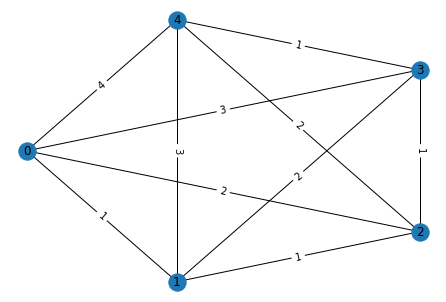

In [3]:
graph_type = 0
G = get_graph(graph_type)

In [5]:
from networkx.algorithms.approximation import maxcut
maxcut.one_exchange(G, weight="weight")

In [6]:
n = len(G)

L_orig = nx.laplacian_matrix(G).toarray()
L_val = np.copy(L_orig)
L = cp.Parameter((n,n), value=L_val)

e = cp.Parameter(n, value=np.ones(n))

In [8]:
X = cp.Variable((n,n), PSD=True)
constraints = [ cp.diag(X) == e ]
# constraints += [ cp.trace(J @ X) == (n - 2*s)**2 ]
prob = cp.Problem(cp.Maximize(1/4 * cp.trace(L @ X)), constraints)

# prob.solve(solver=cp.CVXOPT)
prob.solve()

# Print result.
print("The optimal value is", prob.value)
print("A solution X is")
print(X.value)
print(prob.status)

print("rank(X) =", (np.linalg.matrix_rank(X.value, tol=1e-6)))
print()
print("eigenvalues:")
print(np.linalg.eig(X.value)[0])
print("eigenvectors:")
print(np.linalg.eig(X.value)[1])

The optimal value is 15.20425904647879
A solution X is
[[ 1.          0.99080132 -0.1809183  -0.97405626 -0.93452941]
 [ 0.99080132  0.99999999 -0.04629733 -0.99569884 -0.97405626]
 [-0.1809183  -0.04629733  1.00000001 -0.04629733 -0.1809183 ]
 [-0.97405626 -0.99569884 -0.04629733  0.99999999  0.99080132]
 [-0.93452941 -0.97405626 -0.1809183   0.99080132  1.        ]]
optimal
rank(X) = 5

eigenvalues:
[3.93020973e+00 1.06975007e+00 3.07040997e-06 1.86101482e-05
 1.85251368e-05]
eigenvectors:
[[ 4.96093745e-01  1.74921695e-01 -5.79911725e-01  3.64835298e-01
  -5.03875969e-01]
 [ 5.03875973e-01  4.47619924e-02 -3.66060660e-01 -6.03320779e-01
   4.96093740e-01]
 [ 4.16937809e-15 -9.66849279e-01 -2.43729295e-01  7.61478941e-02
   7.66610894e-10]
 [-5.03875973e-01  4.47619924e-02 -3.66060660e-01 -6.03320771e-01
  -4.96093751e-01]
 [-4.96093745e-01  1.74921695e-01 -5.79911725e-01  3.64835290e-01
   5.03875976e-01]]


In [ ]:
v = np.linalg.eig(X.value)[1].T[0]

In [ ]:
L.value = L.value - v.reshape(-1,1) @ v.reshape(1,-1)

prob.solve(solver=cp.CVXOPT)

print("A new solution X is")
print(X.value)
print()
print("The objective value in the original problem is", 1/4 * np.trace(L_orig @ X.value))

print("rank(X) =", (np.linalg.matrix_rank(X.value, tol=1e-6)))
print()

print("eigenvalues:")
print(np.linalg.eig(X.value)[0])
print("eigenvectors:")
print(np.linalg.eig(X.value)[1])